## Observations and Insights 

In [10]:
# 1. The gender distribution among the mice is roughly equal.
# 2. Mice treated with Ramicane have the smallest tumor volume average; 
#    mice treated with Ketapril have the largest tumor volume average.
# 3. When treated with Capomulin, the Pearson correlation coefficient between average weight and tumor volume  
#    of mice treated with Capomulin is 0.84, which suggests a strong correlation. 
#    The positive correlation can also be visually observed with 
#    the scatter plot and the line calculated by the linear regression.
# 4. Ramicane and Capomulin have the most timepoints for all mice tested.
# 5. Infubinol has one potential outlier that is below the lower extreme.
# 6. Among the four most promising drug regimens, Ramicane and Capomulin illustrate smaller final tumor volumes.
#    Ramicane slightly bests Capomulin in final tumor volumes.

In [11]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import random as rd
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata,study_results,on="Mouse ID")
# Display the data table for preview
mouse_study



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [12]:
# Checking the number of mice.
mouse_count= len(mouse_study["Mouse ID"].unique())
mouse_count

249

In [13]:
mice = mouse_study[["Mouse ID","Drug Regimen"]]
mice["Drug Regimen"].value_counts()

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Infubinol    178
Ceftamin     178
Propriva     161
Name: Drug Regimen, dtype: int64

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = mouse_study[mouse_study.duplicated(["Mouse ID","Timepoint"])]
duplicates


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [15]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_dup = mouse_study.loc[mouse_study["Mouse ID"]=='g989',:]
g989_dup


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [16]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.loc[mouse_study["Mouse ID"]!='g989',:]
clean_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [17]:
# Checking the number of mice in the clean DataFrame.
new_mouse_count= len(clean_mouse_study["Mouse ID"].unique())
new_mouse_count

248

## Summary Statistics

In [18]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
drug_grouped = clean_mouse_study.groupby("Drug Regimen")
dr_mean = drug_grouped["Tumor Volume (mm3)"].mean()
dr_median = drug_grouped["Tumor Volume (mm3)"].median()
dr_variance = drug_grouped["Tumor Volume (mm3)"].var()
dr_stdev = drug_grouped["Tumor Volume (mm3)"].std()
dr_sem = drug_grouped["Tumor Volume (mm3)"].sem()
drug_summary_stat = pd.DataFrame({"Mean":dr_mean,"Median":dr_median,
                                        "Variance":dr_variance,"Standard Deviation":dr_stdev,
                                       "SEM":dr_sem})
drug_summary_stat

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
aggr_drug_summary = drug_grouped["Tumor Volume (mm3)"].agg([("Mean",np.mean),("Median",np.median),("Variance",np.var),
                                                            ("Standard Deviation",np.std),("SEM",st.sem)])
aggr_drug_summary

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

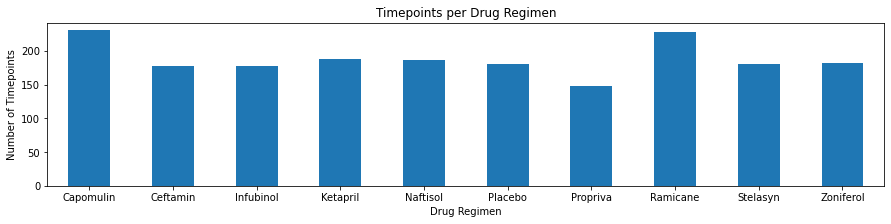

In [20]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
drug_bar = pd.DataFrame(clean_mouse_study.groupby("Drug Regimen").count().reset_index())
bar = drug_bar.plot(kind="bar",x="Drug Regimen",y='Timepoint',figsize=(15,3),rot=0,
                    xlabel="Drug Regimen",ylabel="Number of Timepoints",title="Timepoints per Drug Regimen",legend=False)

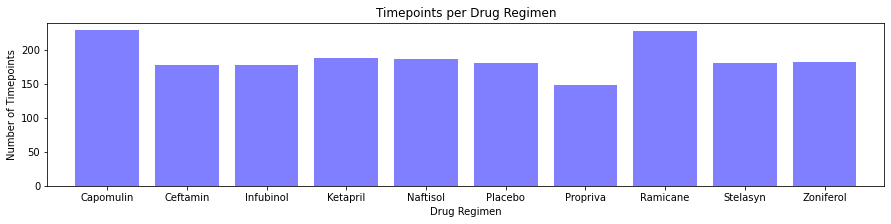

In [21]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
y_axis = drug_bar["Timepoint"]
x_axis=np.arange(len(drug_bar["Drug Regimen"]))

plt.figure(figsize=(15, 3))
plt.xlabel("Drug Regimen")
plt.bar(x_axis,y_axis,alpha=0.5, align="center",color="blue")
plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(y_axis)+10)
plt.xticks(x_axis,drug_bar["Drug Regimen"],rotation=0)
plt.ylabel("Number of Timepoints")
plt.title("Timepoints per Drug Regimen")
plt.show()

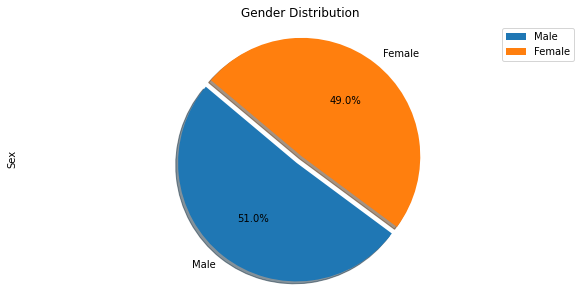

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_dist = pd.DataFrame(clean_mouse_study["Sex"].value_counts())
explode = (0.07, 0)
gender_dist.plot(kind="pie",y="Sex",title="Gender Distribution",explode=explode,
                 figsize=(10, 5),autopct="%1.1f%%", shadow=True,startangle=140)
plt.axis("equal")
plt.show()

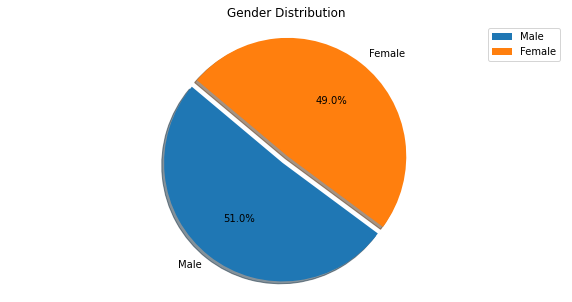

In [23]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Male","Female"]
explode = (0.07, 0)
plt.figure(figsize=(10,5))
plt.pie(gender_dist["Sex"],labels=labels,explode=explode,
               autopct="%1.1f%%", shadow=True,startangle=140)
plt.title("Gender Distribution")
plt.axis("equal")
plt.legend(loc= "best")
plt.show()

## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
mouse_grouped = clean_mouse_study.groupby("Mouse ID").max()["Timepoint"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
volume = pd.merge(clean_mouse_study,mouse_grouped,how="inner",on=["Mouse ID", "Timepoint"])

In [25]:
# Put treatments into a list for for loop (and later for plot labels)
drug_subset=['Capomulin','Ramicane','Infubinol','Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_final=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset
    # Determine outliers using upper and lower bounds
for drug in drug_subset:
    tum_vol = volume.loc[volume["Drug Regimen"]==drug]["Tumor Volume (mm3)"]
    tumor_final.append(tum_vol)
    tum_quartiles = tum_vol.quantile([.25,.5,.75])
    lowerq = tum_quartiles[0.25]
    upperq = tum_quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tum_vol.loc[(tum_vol<lower_bound) | (tum_vol>upper_bound)]
    outliers
    print(f"The lower quartile of Tumor Volume in mm3 for {drug} is: {round(lowerq,2)}.")
    print(f"The upper quartile of Tumor Volume in mm3 for {drug} is: {round(upperq,2)}.")
    print(f"The interquartile range of Tumor Volume in mm3 for {drug} is: {round(iqr,2)}.")
    print(f"The the median of Tumor Volume in mm3 for {drug} is: {round(tum_quartiles[0.5],2)}. ")
    print(f"For {drug}: values below {round(lower_bound,2)} and above {round(upper_bound,2)} could be outliers.")
    print(f'The number of outliers for {drug} is {len(outliers)}.')

The lower quartile of Tumor Volume in mm3 for Capomulin is: 32.38.
The upper quartile of Tumor Volume in mm3 for Capomulin is: 40.16.
The interquartile range of Tumor Volume in mm3 for Capomulin is: 7.78.
The the median of Tumor Volume in mm3 for Capomulin is: 38.13. 
For Capomulin: values below 20.7 and above 51.83 could be outliers.
The number of outliers for Capomulin is 0.
The lower quartile of Tumor Volume in mm3 for Ramicane is: 31.56.
The upper quartile of Tumor Volume in mm3 for Ramicane is: 40.66.
The interquartile range of Tumor Volume in mm3 for Ramicane is: 9.1.
The the median of Tumor Volume in mm3 for Ramicane is: 36.56. 
For Ramicane: values below 17.91 and above 54.31 could be outliers.
The number of outliers for Ramicane is 0.
The lower quartile of Tumor Volume in mm3 for Infubinol is: 54.05.
The upper quartile of Tumor Volume in mm3 for Infubinol is: 65.53.
The interquartile range of Tumor Volume in mm3 for Infubinol is: 11.48.
The the median of Tumor Volume in mm3 fo

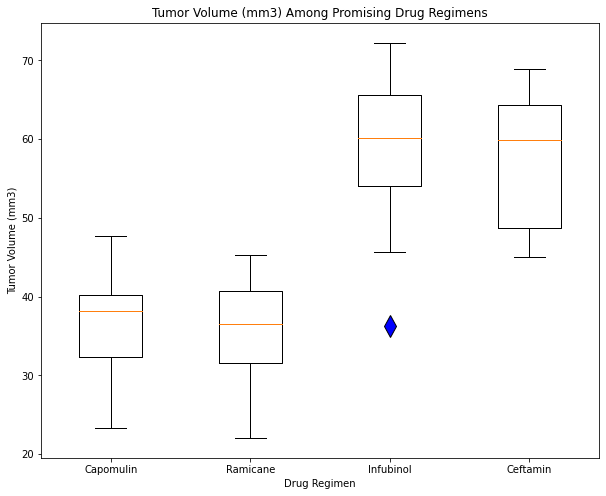

In [26]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1,ax1=plt.subplots(figsize=(10,8))
flierprops = dict(marker='d', markerfacecolor='blue', markersize=15,
                  linestyle='none')
ax1.boxplot(tumor_final,flierprops=flierprops)
ax1.set_xlabel("Drug Regimen")
ax1.set_ylabel("Tumor Volume (mm3)")
ax1.set_title("Tumor Volume (mm3) Among Promising Drug Regimens")
ax1.xaxis.set(ticks=np.arange(1,len(drug_subset)+1),ticklabels = drug_subset)
plt.show()

## Line and Scatter Plots

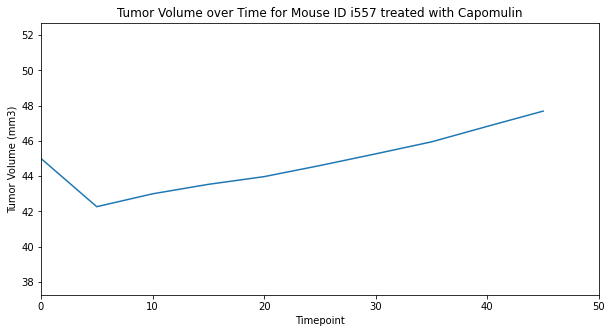

In [27]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

#Filter for just Capomulin
capomulin_df = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"]=="Capomulin"),:]
#Choose a random mouse
random_mouse = capomulin_df["Mouse ID"].sample().reset_index(drop=True)

#Setting x and y values for line plot
timepoint = capomulin_df.loc[capomulin_df["Mouse ID"]==random_mouse[0]]["Timepoint"].reset_index(drop=True)
tumor = capomulin_df[capomulin_df["Mouse ID"]==random_mouse[0]]["Tumor Volume (mm3)"].reset_index(drop=True)
plt.figure(figsize=(10,5))
plt.plot(timepoint,tumor)
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(0,timepoint.max()+5)
plt.ylim(tumor.min()-5,tumor.max()+5)
plt.title(f"Tumor Volume over Time for Mouse ID {random_mouse[0]} treated with Capomulin")
plt.show()

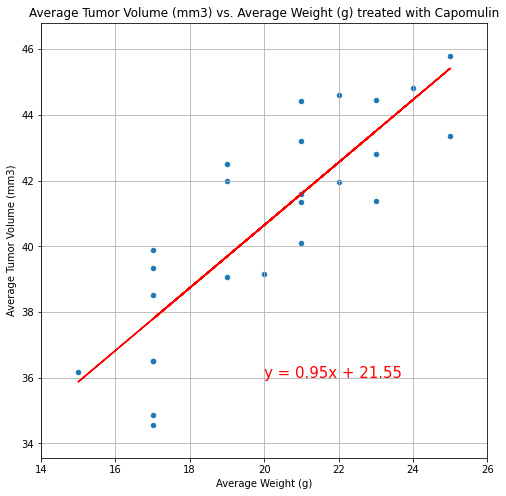

In [28]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df = clean_mouse_study.loc[(clean_mouse_study["Drug Regimen"]=="Capomulin"),:]

tvol_ave = capomulin_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
w_ave = capomulin_df.groupby("Mouse ID")["Weight (g)"].mean()
weight_df = pd.merge(tvol_ave,w_ave,on="Mouse ID",how="inner")

weight_df.plot(kind="scatter",x="Weight (g)",y="Tumor Volume (mm3)",
               xlabel="Average Weight (g)",ylabel="Average Tumor Volume (mm3)",
                title = "Average Tumor Volume (mm3) vs. Average Weight (g) treated with Capomulin",
               figsize=(8,8),grid=True,xlim=(w_ave.min()-1,w_ave.max()+1),ylim=(tvol_ave.min()-1,tvol_ave.max()+1))
#Plotting the linear regression fit line on the scatter plot
x_values = weight_df["Weight (g)"]
y_values = weight_df["Tumor Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
plt.plot(x_values,regress_values,"r-")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.show()

## Correlation and Regression

In [29]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(weight_df["Weight (g)"],weight_df["Tumor Volume (mm3)"])
print(f"For mice treated with Capomulin, \
the correlation coefficient between weight and average tumor volume is {round(correlation[0],2)}")

For mice treated with Capomulin, the correlation coefficient between weight and average tumor volume is 0.84


The r-squared is: 0.7088568047708723


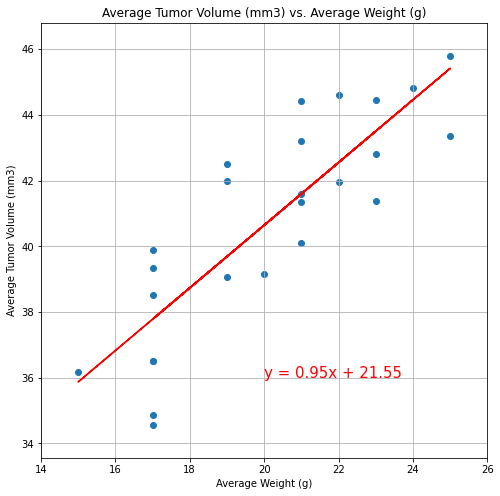

In [30]:
#Declare x and y values, same values from the previous scatter plot
x_values = weight_df["Weight (g)"]
y_values = weight_df["Tumor Volume (mm3)"]

#Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.figure(figsize=(8,8))
plt.grid(True)
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,36),fontsize=15,color="red")
plt.xlim(w_ave.min()-1,w_ave.max()+1)
plt.ylim(tvol_ave.min()-1,tvol_ave.max()+1)
plt.xlabel("Average Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume (mm3) vs. Average Weight (g)")
print(f"The r-squared is: {rvalue**2}")
plt.show()